# Proyecto Diamantes 💎


###  Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from src.arreglardatos import *
from src.ModelosOptimizaryProbar import *



from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RANSACRegressor




Damos variables los archivos csv

In [2]:
diamantes_test =  pd.read_csv('../Output/diamonds_test.csv')

In [3]:
diamantes_train =  pd.read_csv('../Output/diamonds_train.csv')

In [4]:
diamantes_sample =  pd.read_csv('../Output/sample_submission.csv')

In [5]:
display(diamantes_sample.head(),diamantes_sample.shape)

,Unnamed: 0,price
0,0,16116
1,1,17682
2,2,17949
3,3,8223
4,4,3680


(13449, 2)

In [6]:
diamantes_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,Ideal,G,VS1,60.6,56.0,5.33,5.36,3.24
1,1,0.32,Premium,H,VS2,61.9,58.0,4.39,4.37,2.71
2,2,0.71,Good,G,VS2,64.2,58.0,5.59,5.62,3.60
3,3,1.12,Premium,H,VS1,62.1,58.0,6.64,6.60,4.11
4,4,1.21,Ideal,G,VS2,61.5,56.0,6.83,6.88,4.22


In [7]:
diamantes_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.32,Ideal,D,VS2,61.9,55.0,4.43,4.39,2.73,972
1,1,0.40,Premium,F,VS2,59.7,58.0,4.79,4.83,2.87,842
2,2,0.54,Very Good,D,VS2,61.1,59.0,5.25,5.29,3.22,1583
3,3,0.51,Ideal,G,VS1,61.7,55.0,5.17,5.14,3.18,1781
4,4,1.01,Very Good,F,SI2,62.8,60.0,6.33,6.40,4.00,4416


Miramos el nombre de las columnas

In [8]:
diamantes_train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

## Empezamos con la limpieza del dataset

In [9]:
diamantes_train['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 40342, 40343, 40344])

Vemos que tenemos un doble index asi que
eliminamos el doble indice que tiene la colmna

In [10]:
diamantes_train = diamantes_train.drop(['Unnamed: 0'],axis =1)

In [11]:
display(diamantes_train.head(),diamantes_train.shape)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,Ideal,D,VS2,61.9,55.0,4.43,4.39,2.73,972
1,0.40,Premium,F,VS2,59.7,58.0,4.79,4.83,2.87,842
2,0.54,Very Good,D,VS2,61.1,59.0,5.25,5.29,3.22,1583
3,0.51,Ideal,G,VS1,61.7,55.0,5.17,5.14,3.18,1781
4,1.01,Very Good,F,SI2,62.8,60.0,6.33,6.40,4.00,4416


(40345, 10)

Vemos los elementos de  las columnas "cut","clarity" y "color"

In [12]:
print(f"Columna cut: {diamantes_train['cut'].unique()}\nColumna clarity: {diamantes_train['clarity'].unique()}\nColumna color: {diamantes_train['color'].unique()}") 


Columna cut: ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
Columna clarity: ['VS2' 'VS1' 'SI2' 'SI1' 'VVS2' 'VVS1' 'IF' 'I1']
Columna color: ['D' 'F' 'G' 'E' 'I' 'H' 'J']


Vamos a ver si hay alguna columna con valores nulos


In [13]:
diamantes_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


Hago categoricas las columnas que tienen tipo object.Y los pasamos a valores numéricos

In [14]:
diamantes_train = category(diamantes_train)
display(diamantes_train.head())

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,2,0,5,61.9,55.0,4.43,4.39,2.73,972
1,0.40,3,2,5,59.7,58.0,4.79,4.83,2.87,842
2,0.54,4,0,5,61.1,59.0,5.25,5.29,3.22,1583
3,0.51,2,3,4,61.7,55.0,5.17,5.14,3.18,1781
4,1.01,4,2,3,62.8,60.0,6.33,6.40,4.00,4416


Divido Diamantes en la X y la y para la prueba

In [15]:
X_diamantes = diamantes_train[diamantes_train.columns.difference(["price"])]
y_diamantes = diamantes_train["price"]
display(X_diamantes.head(),y_diamantes.head(),X_diamantes.shape)

,carat,clarity,color,cut,depth,table,x,y,z
0,0.32,5,0,2,61.9,55.0,4.43,4.39,2.73
1,0.40,5,2,3,59.7,58.0,4.79,4.83,2.87
2,0.54,5,0,4,61.1,59.0,5.25,5.29,3.22
3,0.51,4,3,2,61.7,55.0,5.17,5.14,3.18
4,1.01,3,2,4,62.8,60.0,6.33,6.40,4.00


0     972
1     842
2    1583
3    1781
4    4416
Name: price, dtype: int64

(40345, 9)

Vamos a estandarizar y normalizar los valores

In [17]:

diamantes = stand_Normalize(X_diamantes)
display(diamantes.shape)

(40345, 9)

Ahora voy a pasar el mismo filtro el dataset de test


In [18]:
diamantes_testeo = category(diamantes_test)
diamantes_testeo = stand_Normalize(diamantes_testeo)
diamantes_testeo = diamantes_testeo.drop(['Unnamed: 0'],axis =1)
display(diamantes_testeo)

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.223101,-0.240616,0.101406,0.039031,-0.356832,-0.290229,-0.159544,-0.149801,-0.190272
1,-0.323918,0.137646,0.260412,0.213145,0.036586,0.078964,-0.383676,-0.393043,-0.382102
2,-0.063040,-0.506997,0.076621,0.222032,0.582554,0.082256,-0.043345,-0.035386,0.028943
3,0.268098,0.170536,0.322638,0.035076,0.101636,0.097832,0.319275,0.306695,0.325426
4,0.306889,-0.193238,0.081439,0.235994,-0.060132,-0.233083,0.345290,0.363135,0.346911
...,...,...,...,...,...,...,...,...,...
13444,-0.307239,-0.209152,0.312072,0.033927,-0.146779,-0.078824,-0.295819,-0.322989,-0.319925
13445,-0.037648,-0.496986,0.162003,0.017613,0.658910,0.409296,-0.034752,-0.044364,0.034475
13446,-0.209642,-0.271409,0.114383,0.044027,-0.225809,-0.102288,-0.144499,-0.128768,-0.157327
13447,-0.070208,0.143656,-0.508285,-0.163357,0.251628,0.535590,-0.037476,-0.050443,-0.014262


Miramos si estan relacionados por lo que se ve no lo estas

In [19]:
corr_ma = diamantes.corr()
corr_ma[corr_ma>0.8]

,carat,clarity,color,cut,depth,table,x,y,z
carat,1.000000,NaN,NaN,NaN,NaN,NaN,0.975955,0.974691,0.973687
clarity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
cut,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
x,0.975955,NaN,NaN,NaN,NaN,NaN,1.000000,0.997564,0.990856
y,0.974691,NaN,NaN,NaN,NaN,NaN,0.997564,1.000000,0.990340
z,0.973687,NaN,NaN,NaN,NaN,NaN,0.990856,0.990340,1.000000


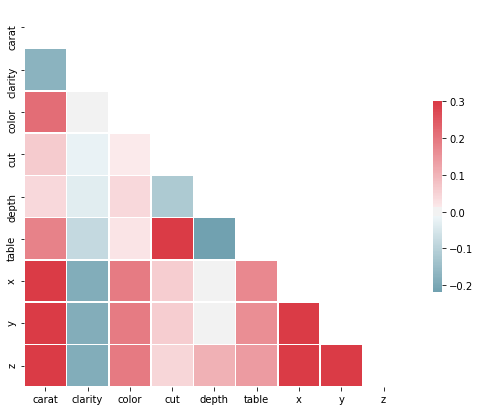

In [20]:
mask = np.zeros_like(corr_ma, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_ma, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Empezamos las pruebas de entrenamiento

Pruebo el RandomForestRegressor

In [20]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
regr = RandomForestRegressor(max_depth=2, random_state=0)

diamantesRFR= regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Acurray : ",r2_score(y_test, y_pred))
compareRFR = pd.DataFrame({'price':y_pred})
compareRFR

Acurray :  0.8127515529927588


,price
0,6363.369810
1,3115.323705
2,1051.671283
3,1051.671283
4,6363.369810
...,...
8064,1051.671283
8065,1051.671283
8066,3115.323705
8067,1051.671283


In [21]:
y_predRFR= diamantesRFR.predict(diamantes_testeo)
display(y_predRFR.shape,diamantes_testeo.shape)
#Lo aplicamos para hacer la predicción

compareRFR = pd.DataFrame({"id":list(range(0,len(y_predRFR))),'price':y_predRFR})
display(compareRFR)

(13449,)

(13449, 9)

,Unnamed: 0,price
0,0,1051.671283
1,1,1051.671283
2,2,3115.323705
3,3,6363.369810
4,4,6363.369810
...,...,...
13444,13444,1051.671283
13445,13445,3115.323705
13446,13446,1051.671283
13447,13447,3094.219866


Creo un csv para subirlo

In [22]:
compareRFR.to_csv('../Output//sample_submissionRandomREgresion.csv')

Voy a probar el GradientBoostingRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
gradient = ensemble.GradientBoostingRegressor( n_estimators = 50,max_depth = 6,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesGBR = gradient.fit(X_train, y_train)
y_predGradienet = gradient.predict(X_test)
print(r2_score(y_test, y_predGradienet))

0.9604647047089433


In [43]:
y_predGBR= diamantesGBR.predict(diamantes_testeo)
compareGBR = pd.DataFrame({"id":range(len(y_predGBR)),"price":y_predGBR})

In [44]:
compareGBR.to_csv('../Output//sample_submissionGradientBoostingRegressor.csv',index=False)


Practamos con el modelo GradientBoostingRegressor

In [32]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  

gradient = ensemble.GradientBoostingRegressor( loss= "huber",n_estimators = 50,max_depth = 8,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesRFR = gradient.fit(X_train, y_train)
y_pred = diamantesRFR.predict(X_test)
print(r2_score(y_test, y_pred))

0.9591167122731298


In [ ]:
params = { 
           'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[50,2750],                    
          "random_state": [3,10,100]    
          
         }
tuning_gradientGradient = GridSearchCV(estimator=diamantesRFR,param_grid=params,scoring="r2",verbose = 10, n_jobs=7, cv=5)

def optimizar_modelos(tuning,X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)  
    #tuning_gradientGradient = GridSearchCV(estimator=tuning,param_grid=params,scoring="r2",verbose = 10, n_jobs=7, cv=5)

    t0 =time()
    observando = tuning.fit(X_train,y_train)
    y_pred = observando.predict(X_test)
    print(r2_score(y_test, y_pred))

    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(observando.best_estimator_)
    return y_pred
resultado = optimizar_modelos(tuning_gradientGradient,diamantes,y_diamantes)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   20.9s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:   40.4s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed: 21.5min


Voy a probar la PLSRegression


In [47]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)        

from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=100, scale=True, max_iter=500, tol=1e-06, copy=True
m = pls2.fit(X_train, y_train)
y_pred = m.predict(X_test)  
print(r2_score(y_test, y_pred))
#r2_score = 0.8489243795102168                     

SyntaxError: invalid syntax (<ipython-input-47-53989608a2a0>, line 6)

In [25]:
#Probando en colab

c =['newton-cg', 'sag', 'saga' , 'lbfgs' ]
for e in c:
    X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)        
    print("modelo:  "  ,e)
    model = LogisticRegression(C=10,random_state=12 ,solver=e,n_jobs=6)
    m = model.fit(X_train, y_train)
    y_pred = m.predict(X_test) 
     print("Terminado el modelo:  "  ,e)
    print(r2_score(y_test, y_pred))    
    
"""modelo:   newton-cg
Terminado el modelo:   newton-cg
0.7331343469414701
modelo:   sag
Terminado el modelo:   sag
0.6993192236265758
modelo:   saga
Terminado el modelo:   saga
0.7049012313114302
modelo:   lbfgs
Terminado el modelo:   lbfgs
0.7451729344305205
"""

SyntaxError: invalid syntax (<ipython-input-25-4e5c9cb90067>, line 1)

Entrenando HistGradientBoostingRegressor

In [69]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
histaGBR = HistGradientBoostingRegressor(max_iter =100,max_leaf_nodes=50)
params = { 'learning_rate':[0.15,0.1,0.05], 
           'max_bins':[50,1750],
           'random_state':[50, 100],
           'min_samples_leaf': [50, 100]}
os la predición y nos dice cual funciona mejor  
resultasoHGBR = optimizar_modelos(histaGBR,diamantes,y_diamantes)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    4.5s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    4.8s
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    5.0s
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    6.1s
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed:    8.1s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    9.8s
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed:   10.0s
[Parallel(n_jobs=7)]: Batch computation too fast (0.1956s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done  84 tasks      | elapsed:   12.8s
[Parallel(n_jobs=7)]: Done 107 out of 120 | elapsed:   14.5s remaining:    1.8s
[Parallel(n_jobs=7)]: Done 120 out of 120 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=7)]: Done 120 out of 120 | elapsed:   16.1s finished


0.9668563074510831
done in 17.586s
Best estimator found by grid search:
HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
historiGrand=HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


historiGrandEstimacion =  historiGrand.fit(X_train, y_train)
y_pred = historiGrandEstimacion.predict(X_test)
print(r2_score(y_test, y_pred))

0.9681295876151


In [29]:
y_predhGE = historiGrandEstimacion.predict(diamantes_testeo)

In [30]:
comparehistoriGrandEstimacion2 = pd.DataFrame({"id":range(len(y_predhGE)),"price":y_predhGE })
comparehistoriGrandEstimacion2.shape
comparehistoriGrandEstimacion2.to_csv('../Output//sample_submissionHitGradientBoostingRegressor.csv',header=True)

Uso estimadores para intentar optimizar el resultado con StackingRegressor

In [27]:
estimators = [
 ('lr', RidgeCV()),
 ('svr', LinearSVR(random_state=42)),
 ("AdaBoostRegressor",   AdaBoostRegressor(random_state=0, n_estimators=100)),
 ("RANSACR", RANSACRegressor(random_state=0)),
 ("GradientBoostingRegressor",ensemble.GradientBoostingRegressor( loss= "huber",n_estimators = 50,max_depth = 8,
                                             min_samples_split = 3,learning_rate = 0.1))
]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))

X_train, X_test, y_train, y_test = train_test_split(diamantes, y_diamantes, random_state=42)
modelotop = reg.fit(X_train, y_train)
modelotop.score(X_test, y_test)

0.9606305105753804

Ahora con estimador de union intentare mejorar el resultado con VotingRegressor 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(diamantes, y_diamantes, random_state=42)
from sklearn.ensemble import VotingRegressor
historiGrand = HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)



solucion = VotingRegressor([('lr', modelotop), ('rf', historiGrand)])
print(solucion.fit(X_train, y_train).predict(X_test))

[1373.31119846  752.5259328  4390.86395446 ...  685.67214277 7580.25995905
  686.14998512]


In [30]:
solucion.score(X_test, y_test)

0.9687614084397578

In [46]:
y_predVRHMTOP= solucion.predict(diamantes_testeo)
display(y_predVRHMTOP.shape,diamantes_testeo.shape)

compareVotingRegresorhistyModelotop= pd.DataFrame({"id":range(len(y_predVRHMTOP)),"price":y_predVRHMTOP})
compareVotingRegresorhistyModelotop.to_csv('../Output//sample_submissionVotingRegresor(histyModelotop).csv',index=False)


(13449,)

(13449, 9)